In [13]:
import os
import sys
import urllib.request

In [14]:
import pandas as pd
import json
from pandas import json_normalize

### 클라이언트 아이디, 클라이언트 시크릿

In [15]:
client_id = "3r3VlFmqyy3Fnu9FITk0" # Your client_id
client_secret = "Jc9Vc2SW6t" # Your client_secret

### 1. 쇼핑인사이트 분야별 트렌드 조회
- POST : url, params, headers

<AxesSubplot:xlabel='period'>

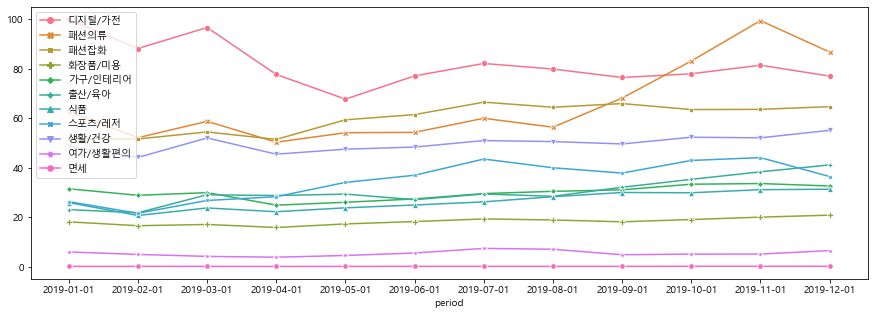

In [18]:
%matplotlib inline
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt    

headers = {"X-Naver-Client-Id": "7Le6MjXCw7RJSBE_E6iK", 
           "X-Naver-Client-Secret":"rR9g3CayLg"}

url = "https://openapi.naver.com/v1/datalab/shopping/categories"

categories = [
      {"name": "패션잡화", "param": [ "50000001"]},
      {"name": "화장품/미용", "param": [ "50000002"]},
      {"name": "가구/인테리어", "param": [ "50000004"]},
      {"name": "출산/육아", "param": [ "50000005"]},
      {"name": "식품", "param": [ "50000006"]},
      {"name": "스포츠/레저", "param": [ "50000007"]},
      {"name": "생활/건강", "param": [ "50000008"]},
      {"name": "여가/생활편의", "param": [ "50000009"]},
      {"name": "면세", "param": [ "50000010"]}
  ]

data = {
  "startDate": "2019-01-01",
  "endDate": "2019-12-31",
  "timeUnit": "month",
  "category": [
      {"name": "디지털/가전", "param": [ "50000003"]},
      {"name": "패션의류", "param": [ "50000000"]},
  ]
}


def change_index(df, column_name):
    df = df.set_index("period")
    df.columns = [column_name]
    return df

response = requests.post(url, headers=headers, json=data)

results = response.json()["results"]


df_a = change_index(pd.DataFrame(results[0]["data"]), "디지털/가전")
df_b = change_index(pd.DataFrame(results[1]["data"]), "패션의류")

df_all = pd.merge(df_a, df_b, left_on="period", right_on="period")

for category in categories:
    if len(data["category"]) > 2:
        data["category"].pop(2)
    data["category"].append(category)
    
    result = requests.post(url, headers=headers, json=data)

    results = result.json()["results"]

    df = change_index(pd.DataFrame(results[2]["data"]), category["name"]) 

    df_all = pd.merge(df_all, df, left_on="period", right_on="period")
    

mpl.rc('font', family='Malgun Gothic')
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)

In [19]:
df_all

,디지털/가전,패션의류,패션잡화,화장품/미용,가구/인테리어,출산/육아,식품,스포츠/레저,생활/건강,여가/생활편의,면세
period,,,,,,,,,,,
2019-01-01,100.00000,62.79036,51.76623,18.17945,31.52231,23.11522,25.97358,26.34030,48.69987,6.01380,0.17125
2019-02-01,88.20876,52.17707,51.66582,16.61786,28.90269,21.85876,20.75312,21.63240,44.20518,5.01320,0.18222
2019-03-01,96.70750,58.79456,54.50925,17.12812,29.97721,29.12057,23.78990,26.82136,52.07614,4.22217,0.18012
2019-04-01,77.71857,50.38020,51.48792,15.89807,24.92945,28.81616,22.26972,28.33692,45.52445,3.89585,0.15826
2019-05-01,67.75777,54.18767,59.41106,17.34643,26.08110,29.39108,23.84304,34.12141,47.54255,4.59199,0.17073
2019-06-01,77.15054,54.33798,61.50911,18.29217,27.43893,27.13282,24.98584,37.00699,48.40216,5.58508,0.19558
2019-07-01,82.17693,60.02157,66.53664,19.35963,29.60886,29.43822,26.25334,43.55797,51.02104,7.45291,0.19534
2019-08-01,79.92050,56.42463,64.48276,18.93592,30.50270,28.51188,28.33866,40.03046,50.61194,7.09989,0.18785
2019-09-01,76.51251,68.20262,65.97435,18.18989,31.12063,32.15754,30.03554,37.88229,49.65580,4.89477,0.18392


### 5. 쇼핑인사이트 키워드 별 트렌드 조회
- POST : url, params, headers

### 함수화 : 트렌드를 분석할 기간(시작날짜, 종료날짜)을 파라미터로 넘기면 해당 기간에서의 카테고리 별 키워드의 클릭량을 뽑아냄

In [20]:
def category_keyword_trend(startDate, endDate):
    headers = {"X-Naver-Client-Id": client_id, 
               "X-Naver-Client-Secret": client_secret,
               "Content-Type":"application/json"}

    url = "https://openapi.naver.com/v1/datalab/shopping/category/keywords";
    body =   {
        "startDate": startDate,
        "endDate": endDate,
        "timeUnit": "month",
        "category": "50000002",
        "keyword": [
            {"name":"베이스메이크업", "param": [ "파운데이션"]},
            {"name": "색조메이크업", "param": [ "립틴트"]},
            {"name": "마스크/팩", "param": [ "마스크시트"]},
            {"name": "스킨케어", "param": [ "미스트"]},

        ],
        "device": "",
        "gender": "",
        "ages": [ ]
    }

    response = requests.post(url, headers=headers, json=body)
    results = response.json()["results"]

    month=[]
    # 베이스메이크업과 관련된 키워드 트렌드(베이스메이크업:파운데이션)
    base_makeup_ratio=[]
    for i in results[0]['data']:
        month.append(i['period'])
        base_makeup_ratio.append(i['ratio'])

    # 색조메이크업과 관련된 키워드 트렌드(색조메이크업:립틴트) 
    color_makeup_ratio=[]
    for i in results[1]['data']:
        color_makeup_ratio.append(i['ratio'])

    # 마스크/팩과 관련된 키워드 트렌드(마스크/팩:마스크시트)
    mask_ratio=[]
    for i in results[2]['data']:
        mask_ratio.append(i['ratio'])
        
    # 스킨케어와 관련된 키워드 트렌드(스킨케어:미스트
    skincare_ratio=[]
    for i in results[3]['data']:
        skincare_ratio.append(i['ratio'])
        
    beauty_df=pd.DataFrame()
    beauty_df['Month']=month
    beauty_df['베이스메이크업 클릭량']=base_makeup_ratio
    beauty_df['색조메이크업 클릭량']=color_makeup_ratio
    beauty_df['마스크/팩 클릭량']=mask_ratio
    beauty_df['스킨케어 클릭량']=skincare_ratio
    
    # 날짜를 '연도-월'만 나오게 정리
    import datetime
    beauty_df['Month']=beauty_df['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
    beauty_df['Month']=beauty_df['Month'].apply(lambda x: datetime.datetime.strftime(x,'%Y-%m'))
    beauty_df.set_index('Month',inplace=True)
    
    return beauty_df

In [21]:
beauty_dfs = []
startDateList = ["2019-01-01", "2020-01-01","2021-01-01"]
endDateList = ["2019-12-31", "2020-12-31", "2021-12-31"]
for startDate, endDate in zip(startDateList, endDateList):
    print(startDate +"~" + endDate, end=" / ")
    beauty_dfs.append(category_keyword_trend(startDate, endDate))

2019-01-01~2019-12-31 / 2020-01-01~2020-12-31 / 2021-01-01~2021-12-31 / 

In [22]:
beauty_all_df = pd.concat(beauty_dfs)

In [23]:
beauty_all_df

,베이스메이크업 클릭량,색조메이크업 클릭량,마스크/팩 클릭량,스킨케어 클릭량
Month,,,,
2019-01,51.75800,15.41871,2.85406,48.91933
2019-02,42.72475,11.19766,1.65332,34.33497
2019-03,46.37931,11.45935,2.12130,41.45628
2019-04,43.90701,11.51785,2.04125,47.04741
2019-05,43.57758,12.99261,1.68719,39.80911
2019-06,41.51477,13.54371,1.72721,28.24199
2019-07,46.22229,16.29618,1.49014,45.93596
2019-08,62.19827,17.08743,7.09359,100.00000
2019-09,46.84729,16.27770,2.78017,63.10652


### 시각화

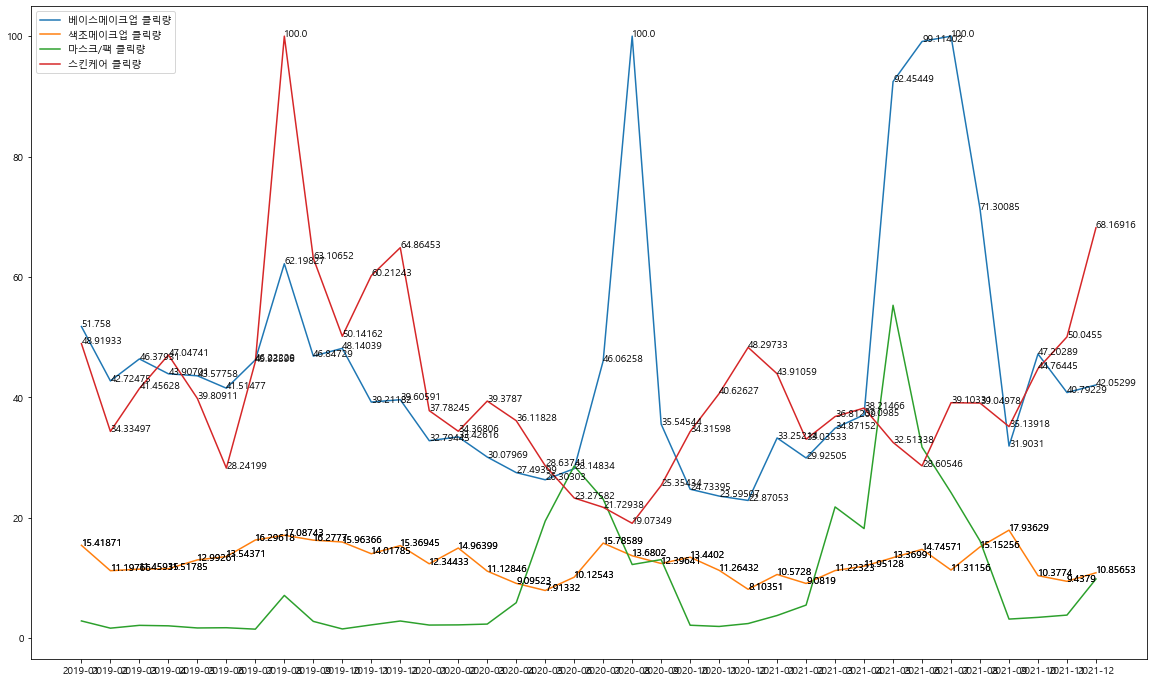

In [25]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"]=10
plt.figure(figsize=(20,12))

plt.plot(beauty_all_df.index, beauty_all_df['베이스메이크업 클릭량'],label='베이스메이크업 클릭량')
for x,y in enumerate(beauty_all_df['베이스메이크업 클릭량']):
    plt.text(x,y,y,fontsize=10)
    
plt.plot(beauty_all_df.index, beauty_all_df['색조메이크업 클릭량'],label='색조메이크업 클릭량')
for x,y in enumerate(beauty_all_df['색조메이크업 클릭량']):
    plt.text(x,y,y,fontsize=10)
    
plt.plot(beauty_all_df.index, beauty_all_df['마스크/팩 클릭량'],label='마스크/팩 클릭량')
for x,y in enumerate(beauty_all_df['색조메이크업 클릭량']):
    plt.text(x,y,y,fontsize=10)
    
plt.plot(beauty_all_df.index, beauty_all_df['스킨케어 클릭량'],label='스킨케어 클릭량')
for x,y in enumerate(beauty_all_df['스킨케어 클릭량']):
    plt.text(x,y,y,fontsize=10)
    
plt.legend(loc='upper left')

plt.show()